In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import os
from sklearn.metrics import mean_squared_error,r2_score 
import pandastable
from tkinter import *
from pandastable import Table, TableModel
import tkinter as tk 
from tkinter import ttk 
# import pickle 
# import joblib  
from sklearn.utils import shuffle 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Data printing

In [28]:

datasets=os.listdir("C:\\Users\\kavin\\OneDrive\\Desktop\\datatata")
data=[]
c=input()
c=c.upper()
c=list(c)
for i in range(len(c)):
    if c[i]==' ':
        c[i]='_'
c=''.join(c)
d=c+"__EQ__INDICES__NSE__MINUTE.csv"
c=c+"__EQ__NSE__NSE__MINUTE.csv"
found=0
for i in datasets:
    if i==c:
        found=1
        break
    elif i==d:
        found=1
        c=d
        break
        
if found:
    path="C:\\Users\\kavin\\OneDrive\\Desktop\\datatata\\"+c
    dataset=pd.read_csv(path)
    dataset['timestamp']=dataset['timestamp'].astype('string')
    dataset[['Date','Time']] = dataset.timestamp.str.split(" ",expand=True,)
    if len(dataset)<200:
        print("Insufficient Data")
    else:
        dataset=dataset.dropna(how="any",subset=['open','high','volume','close'])
        dataset=dataset.drop_duplicates(keep='last')
        dataset['Date']=pd.to_datetime(dataset['Date'])
        print("We will predict stock price daywise")
        reqopen=dataset.groupby('Date')['open'].apply(list).apply(lambda x : x[0])
        reqclose=dataset.groupby('Date')['close'].apply(list).apply(lambda x : x[-1])
        reqhigh=dataset.groupby('Date')['high'].max()
        reqlow=dataset.groupby('Date')['low'].min()
        hropen=[]
        hrclose=[]
        hrhigh=[]
        hrlow=[]
        for k in range(len(reqopen)):
            hropen.append(reqopen[k])
            hrclose.append(reqclose[k])
            hrhigh.append(reqhigh[k])
            hrlow.append(reqlow[k])
        hrdata={'open':hropen,'high':hrhigh,'low':hrlow,'close':hrclose}
        HrData=pd.DataFrame(hrdata)
        dataset=HrData
else:
    print("Company not Present")

Reliance
We will predict stock price daywise


In [30]:
dataset.reset_index(drop=False, inplace=True)
dataset

,level_0,index,open,high,low,close
0,0,0,541.63,545.00,536.20,543.50
1,1,1,544.90,548.50,540.55,544.50
2,2,2,546.00,546.50,532.15,533.58
3,3,3,536.00,539.95,534.50,538.50
4,4,4,537.50,542.50,536.55,536.98
...,...,...,...,...,...,...
826,826,826,1580.00,1615.00,1572.50,1574.50
827,827,827,1564.80,1568.35,1465.00,1486.00
828,828,828,1527.00,1527.00,1454.20,1492.50
829,829,829,1469.00,1496.00,1430.20,1436.90


In [10]:
#Independent Variable and Dependent Variable
start=round((0.84)*len(dataset))
x1 = dataset.iloc[700:,1:4].values 
y1 = dataset.iloc[700:, -1].values
start

698

In [11]:
# Splitting the dataset into the Training set and Test set 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state = 0)


In [12]:
# # Fitting Multiple Linear Regression to the Training set on open
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(x_train, y_train)

LinearRegression()

In [13]:
# Predicting the Test set results 
y_pred = regressor.predict(x_test)

In [14]:
k=list(y_test-y_pred)
len(k)

27

In [15]:
# accuracy metrics 
from sklearn.metrics import mean_squared_error,r2_score 
rmse = (np.sqrt(mean_squared_error(y_test, y_pred))) 
r2score = r2_score(y_test, y_pred)

In [22]:

print(r2score)

0.9362500358355776


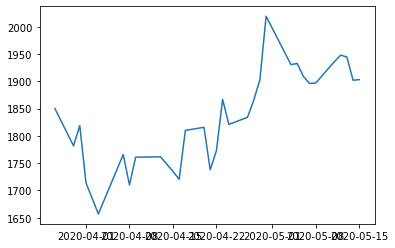

In [16]:
#plt.plot(reqopen[800:])
plt.plot(reqclose[800:])
#plt.plot(reqhigh[800:])
#plt.plot(reqlow[800:])

# for close prediction

In [17]:
# Independent Variable and Dependent Variable 
x2 = dataset.iloc[:,1:4].values 
y2= dataset.iloc[:, 4].values

In [18]:
# Splitting the dataset into the Training set and Test set 
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.2, random_state = 0)

In [19]:
# # Fitting Multiple Linear Regression to the Training set on close
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(x_train, y_train)

LinearRegression()

In [20]:
# Predicting the Test set results 
y_pred = regressor.predict(x_test)

In [21]:
y_test-y_pred

array([ -5.37056822,  22.32072588,  -5.49036322,   6.87025901,
         6.55908732,   8.25936051,   5.70183191, -13.44392892,
       -11.92933503, -10.71629298,   3.28490459,   5.49899303,
         0.81630434,   1.2348054 ,   0.33646384,  -1.17319468,
        -0.82085478,  -4.6791002 ,  -3.05922764,  15.75937879,
        11.24121192,   5.87574668, -13.48921097,   7.13800852,
        -3.469555  ,  -4.29096144,  -0.13690944,  -7.91356166,
        -0.76902388,  -5.58939237,   2.52472044,   2.57782299,
         5.23398879,  -2.02143161,   2.55152   ,  -2.82698085,
        -4.13928792,  -6.15728558,   4.77920669,   1.28876559,
        -8.14405729,  -4.22493655,  -1.3024567 ,   0.3114298 ,
        -7.37728197,  -3.3315432 ,  11.43881414,   3.80920823,
        15.27426254,   0.95767247,   8.92144133,  -5.16172983,
         4.28723526,   1.59674177,  24.72510177,  -2.90191036,
        -9.02136179,   8.47366922,  11.96681398,  -2.48803179,
        14.26739077,   8.44201456,   7.10388013,  -1.08

In [22]:
# accuracy metrics 
from sklearn.metrics import mean_squared_error,r2_score 
rmse = (np.sqrt(mean_squared_error(y_test, y_pred))) 
r2score = r2_score(y_test, y_pred)

In [23]:
print(rmse) 
print(r2score)

12.362467669874013
0.9989656455322679


In [24]:
import os
datasets=os.listdir("F:\PROGRAMMES\pythn\ML Project\HISTORICAL_DATA")
data=[]
c=input()
c=c.upper()
c=list(c)
for i in range(len(c)):
    if c[i]==' ':
        c[i]='_'
c=''.join(c)
d=c+"__EQ__INDICES__NSE__MINUTE.csv"
c=c+"__EQ__NSE__NSE__MINUTE.csv"
found=0
for i in datasets:
    if i==c:
        found=1
        break
    elif i==d:
        found=1
        c=d
        break
        
if found:
    path="F:\PROGRAMMES\pythn\ML Project\HISTORICAL_DATA\\"+c
    dataset=pd.read_csv(path)
    dataset=pd.DataFrame(dataset)
    dataset['timestamp']=dataset['timestamp'].astype('string')
    dataset[['Date','Time']] = dataset.timestamp.str.split(" ",expand=True,)
    if len(dataset)<200:
        print("Insufficient Data")
    else:
        dataset=dataset.dropna(how="any",subset=['open','high','volume','close'])
        dataset=dataset.drop_duplicates(keep='last')
        dataset['Date']=pd.to_datetime(dataset['Date'])
        dataset['Time']=dataset['Time'].apply(lambda i:i[:2])
dataset

PermissionError: [WinError 21] The device is not ready: 'F:\\PROGRAMMES\\pythn\\ML Project\\HISTORICAL_DATA'

In [6]:
op=dataset['open']
op

0          541.63
1          541.45
2          541.63
3          537.33
4          539.95
           ...   
310481    1457.75
310482    1455.45
310483    1452.80
310484    1453.70
310485    1452.70
Name: open, Length: 310348, dtype: float64

(array([28532., 38713., 68474., 40805., 64342., 41090., 28392.]),
 array([ 507.25      ,  665.63571429,  824.02142857,  982.40714286,
        1140.79285714, 1299.17857143, 1457.56428571, 1615.95      ]),
 <a list of 7 Patch objects>)

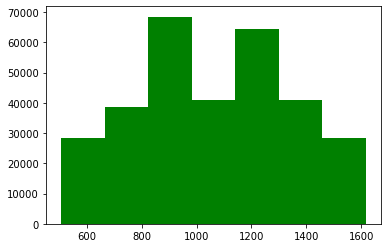

In [12]:
plt.hist(op,bins=7,color='green')

(array([28522., 38665., 68519., 40827., 64336., 41073., 28406.]),
 array([ 507.18      ,  665.58285714,  823.98571429,  982.38857143,
        1140.79142857, 1299.19428571, 1457.59714286, 1616.        ]),
 <a list of 7 Patch objects>)

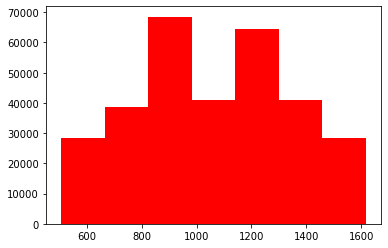

In [13]:
cl=dataset['close']
plt.hist(cl,bins=7,color='red')

# GUI  Of Project

In [ ]:
path="" 
company="" 
created_model=1 
datasets=""
dataset=""
k=0

def set_path():    
    global path    
    path=x1.get()    
    print(path)
    
def set_company():    
    global company    
    company=x2.get() 
    company=company.upper()
    print(company)
           
        
def data_disp():
    global k
    k+=1
    load_model(k)
     
        
    
def load_model(a):    
    global path,company,k,datasets,dataset    
    datasets=os.listdir(path)
    data=[]
    c=company
    c=list(c)
    for i in range(len(c)):
        if c[i]==' ':
            c[i]='_'
    c=''.join(c)
    d=c+"__EQ__INDICES__NSE__MINUTE.csv"
    c=c+"__EQ__NSE__NSE__MINUTE.csv"
    found=0
    for i in datasets:
        if i==c:
            found=1
            break
        elif i==d:
            found=1
            c=d
            break
    if found:
        k+=1
        path=path+'\\'+c
        dataset=pd.read_csv(path)
        dataset['timestamp']=dataset['timestamp'].astype('string')
        dataset[['Date','Time']] = dataset.timestamp.str.split(" ",expand=True,)
        if len(dataset)<200:
            print("Insufficient Data")
        else:
            dataset=dataset.dropna(how="any",subset=['open','high','volume','close'])
            dataset=dataset.drop_duplicates(keep='last')
            dataset['Date']=pd.to_datetime(dataset['Date'])
            print("We will predict stock price daywise")
            reqopen=dataset.groupby('Date')['open'].apply(list).apply(lambda x : x[0])
            reqclose=dataset.groupby('Date')['close'].apply(list).apply(lambda x : x[-1])
            reqhigh=dataset.groupby('Date')['high'].max()
            reqlow=dataset.groupby('Date')['low'].min()
            hropen=[]
            hrclose=[]
            hrhigh=[]
            hrlow=[]
            for k in range(len(reqopen)):
                hropen.append(reqopen[k])
                hrclose.append(reqclose[k])
                hrhigh.append(reqhigh[k])
                hrlow.append(reqlow[k])
            hrdata={'open':hropen,'high':hrhigh,'low':hrlow,'close':hrclose}
            HrData=pd.DataFrame(hrdata)
            dataset=HrData
            dataset.reset_index(drop=False, inplace=True)
    else:
        print("Company not Present")
    print(a,k)
    if a!=0 and k>10:
        class TestApp(Frame):
            def __init__(self, parent=None):
                self.parent = parent
                Frame.__init__(self)
                self.main = self.master
                self.main.geometry('600x400+200+100')
                self.main.title('Data displaying')
                f = Frame(self.main)
                f.pack(fill=BOTH,expand=1)
                df = dataset
                self.table = pt = Table(f, dataframe=df,showtoolbar=True, showstatusbar=True)
                pt.show()
                return

        app = TestApp()
        #launch the app
        app.mainloop()

    else:
        window=tk.Tk()    
        window.geometry('500x200')    
        label=tk.Label(window,text="We do not predict this company stocks value \n  Or \n Write Correct spelling of the Company",font=("Bold",15)).pack() #grid(row=0,column=1)  
        label.config(wraplength=150)    
        tk.mainloop()    
        
def disp_predict():
    global k
    print(k)
    if k!=0:
        x1 = dataset.iloc[700:,1:4].values 
        y1 = dataset.iloc[700:,-1].values
        x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state = 0)
        regressor = LinearRegression() 
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        rmse = (np.sqrt(mean_squared_error(y_test, y_pred))) 
        r2score = r2_score(y_test, y_pred)
        window=tk.Tk()    
        window.geometry('400x300')    
        label=tk.Label(window,text="The rmse value is : "+str(rmse),font=("Bold",10)).pack() #grid(row=0,column=0)
        label=tk.Label(window,text="The r2score value is : "+str(r2score),font=("Bold",10)).pack() #grid(row=1,column=0)    
        label.config(wraplength=150)    
        tk.mainloop() 
        
    else:
        window=tk.Tk()    
        window.geometry('500x200')    
        label=tk.Label(window,text="We do not predict this company stocks value \n  Or \n Write Correct spelling of the Company",font=("Bold",15))    
        label.pack()
        label.config(wraplength=150)    
        tk.mainloop()       
    
window=tk.Tk() 
window.title("Stock Price Predictor") 
x1=tk.StringVar() 
x2=tk.StringVar() 

ttk.Label(window,text="Enter the path of dataset below :").pack() #grid(row=0,column=0) 
ttk.Entry(window,textvariable=x1).pack() #grid(row=0,column=1,columnspan=1) 
ttk.Button(window,text="Submit",command=lambda:set_path()).pack() #grid(row=0,column=2,columnspan=1)

ttk.Label(window,text="Enter the Company Name below:").pack() #grid(row=1,column=0) 
ttk.Entry(window,textvariable=x2).pack() #grid(row=1,column=1,columnspan=1) 
ttk.Button(window,text="Submit",command=lambda : set_company()).pack() #grid(row=1,column=2,columnspan=1)

ttk.Button(window,text="Display data",command = lambda : data_disp()).pack() #grid(row=2,column=1) 

ttk.Button(window,text="Prediction Result",command = lambda : disp_predict()).pack() #grid(row=3,column=1) 


tk.mainloop()

C:\Users\kavin\OneDrive\Desktop\datatata
RELIANCE
We will predict stock price daywise
1 830
830


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\users\kavin\appdata\local\programs\python\python38-32\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-5-2eb8d3290c8f>", line 149, in <lambda>
    ttk.Button(window,text="Prediction Result",command = lambda : disp_predict()).pack() #grid(row=3,column=1)
  File "<ipython-input-5-2eb8d3290c8f>", line 123, in disp_predict
    label.config(wraplength=150)
AttributeError: 'NoneType' object has no attribute 'config'


(array([28635., 38736., 68450., 40871., 64275., 41075., 28306.]),
 array([ 507.6       ,  666.16428571,  824.72857143,  983.29285714,
        1141.85714286, 1300.42142857, 1458.98571429, 1617.55      ]),
 <a list of 7 Patch objects>)

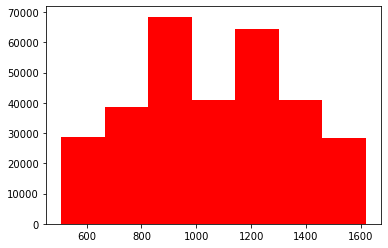

In [14]:
hi=dataset['high']
plt.hist(hi,bins=7,color='red')

In [26]:
dataset

,index,open,high,low,close
0,0,541.63,545.00,536.20,543.50
1,1,544.90,548.50,540.55,544.50
2,2,546.00,546.50,532.15,533.58
3,3,536.00,539.95,534.50,538.50
4,4,537.50,542.50,536.55,536.98
...,...,...,...,...,...
826,826,1580.00,1615.00,1572.50,1574.50
827,827,1564.80,1568.35,1465.00,1486.00
828,828,1527.00,1527.00,1454.20,1492.50
829,829,1469.00,1496.00,1430.20,1436.90
